By Nilusche Liyanaarachchi 2022

# The Perceptron model in Python 

In this task we were asked to model a single perceptron in python and understand how it works.
We were asked to predict the outcome of an unknown logical circuit with the training/target data that was available


# The Basics
Lets look at what the perceptron actually is.

## What is a Perceptron?
A Perceptron is a neural network unit (artifical neuron) that does certain computations to detect a pattern in the input data. <br>
As a part of supervised learning, a perceptron maps certain input values to a binary output value with an unknown linear or nonlinear function.

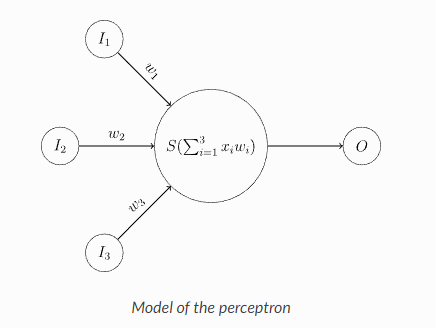

## Perceptron function 
The Perceptron function maps its k inputs *I1 ,..., Ik* which is multiplied with its learned weight coefficient *W1 ,..., Wk* so that an output value *f(x)* is generated

So what the perceptron does is solving the dotproduct of the inputmatrix and the best possible approximation of the weights *W1 ,..., Wk* for the actual observed outputs of the trainingset.

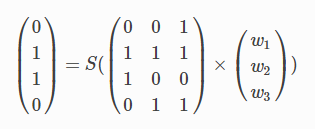

##Activation functions of Perceptrons
The activation function applies a step rule (converts the numerical output into a normalized value) to check if the output of the weighting function is greater than zero or not <br>
<br>
In this Practical we used the Sigmoid function: <br>
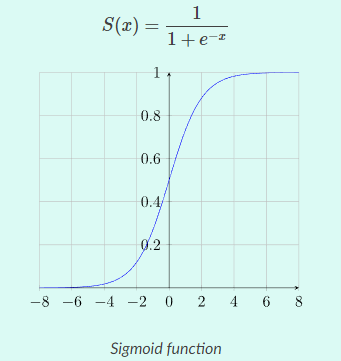

# Install and import dependencies
We use <a href="https://numpy.org/">Numpy</a> to perform complex matrixcalulation like the dotproduct or the transposition.

In [1]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import random

We will gradually build our Perceptron class step by step.

# Implement Sigmoid functions
Lets start with the base function: <br>
On a given value x we can use numpy's np.exp() function to compute the Sigmoid function on it.


In [9]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

print(sigmoid(1.545))

0.824190402911071


The derivative can be calculated similarly by utilizing the base function we have already created

In [10]:
def sigmoid_derivative(x):
  return sigmoid(x) * (1- sigmoid(x))

print(sigmoid_derivative(1.545))

0.1449005826603574


# Training the perceptron
Now that we have our sigmoid functions setup we can initialize a random array of synaptic weights which will be our starting values which will be modified to reach the unknown function <br>
We can also initialize our trainingset.

In [5]:
training_inputs = np.array([[0,0,1], [1,1,1], [1,0,1], [0,1,1]])
training_targets = np.array([0,1,1,0])

n_inputs = 3
synaptic_weights = np.array([random.random() for _ in range(n_inputs)])

We will train the perceptron by letting it "think" over the problem n-times. <br>After each "thought-step" the output signals (O) are compared with the target data (T) to calculate the error (E).<br>The weights can be adjusted accordingly for the next iteration. The adjustments are calculated by multiplying the error with the sigmoid derivative of the outputs and then calculating the dotproduct with the input data.

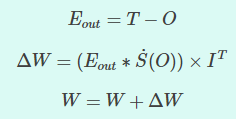

In [6]:
def think(inputs):
        return sigmoid(np.dot(inputs, synaptic_weights)) 

def train(inputs, outputs, iterations):
  for _ in range(iterations):
      output = think(inputs) # O = S(I x W)
      error = outputs - output   # E = T - O
      delta_weight = np.dot(inputs.transpose(), error*sigmoid_derivative(output)) # ΔW = I.T x (E * S(O))
      synaptic_weights += delta_weight	

# The Perceptron class
To organize our functions we have put them in a class called **Perceptron()**

In [7]:
class Perceptron:
    def __init__(self, n_inputs):
        self.synaptic_weights =np.array([random.random() for _ in range(n_inputs)])

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x)*(1-self.sigmoid(x))

    def train(self, inputs, outputs, iterations):
        for _ in range(iterations):
            output = self.think(inputs) # O = S(I x W)
            error = outputs - output   # E = T - O
            delta_weight = np.dot(inputs.transpose(), error*self.sigmoid_derivative(output)) # ΔW = I.T x (E * S(O))
            self.synaptic_weights += delta_weight	
    
    def think(self, inputs):
        return self.sigmoid(np.dot(inputs, self.synaptic_weights)) 
    
    def predict(self,input):
        return round(self.think(input))

Note that here we have an additional function "predict". <br>
The function "predict" returns the most likely logical output given a new test input for our trained model

# Different Iterations of training
Now that we have implemented our Perceptron-Class we can train it with the training_set so we can predict different kinds of inputs. <br>

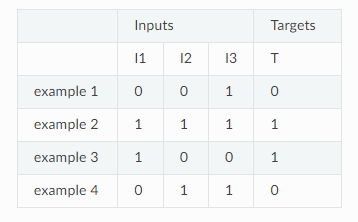

From our sampledata we can assume that signal l1 must be significant for the output signal. After training the perceptron should therefore predict the outcome of the circuit to be 1 given the input [1 1 0] which is not in the training data. <br>
<br>
Lets try testing the perceptron with 10, 100, 1000 and 10000 training iterations.

In [12]:
initial_iterations = 1
for _ in range(4): # train the network 3 times with different iterations
    p = Perceptron(3)
    initial_iterations*=10
    print("Initial iterations:", initial_iterations)
    print("Weights before: ", p.synaptic_weights)
    p.train(np.array([[0,0,1], [1,1,1], [1,0,1], [0,1,1]]), np.array([0,1,1,0]), initial_iterations)
    print("Predicted logical output: ", p.predict(np.array([1,1,0])))
    print("Weights after: " , p.synaptic_weights)
    print("\n")

Initial iterations: 10
Weights before:  [0.95733794 0.43957869 0.50050958]
Predicted logical output:  1
Weights after:  [ 1.95257327 -0.17189022 -0.67797892]


Initial iterations: 100
Weights before:  [0.95101401 0.874831   0.46333662]
Predicted logical output:  1
Weights after:  [ 5.75205676 -0.36549835 -2.59645571]


Initial iterations: 1000
Weights before:  [0.95070061 0.64576453 0.56089401]
Predicted logical output:  1
Weights after:  [10.41007272 -0.41029415 -4.91502608]


Initial iterations: 10000
Weights before:  [0.68363606 0.78429731 0.85718915]
Predicted logical output:  1
Weights after:  [15.03813105 -0.40660232 -7.23286106]




And, as humanly predicted, the model predicts a label of 1